<a href="https://colab.research.google.com/github/fazeelibtesam/first-git/blob/main/Cardio_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools
We're going to use Numpy and Pandas, Matplotlib for data analysis and manipulation.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("cardio_train.csv")
df.shape

(70000, 13)

## Data Cleaning & Preprocessing

In [3]:
df.columns = ['id','age','gender','height', 'weight','systolic_blood_pressure','diastolic_blood_pressure', 'cholesterol', 'glucose', 'smoking', 'alcohol_intake','active','physical_activity']

In [4]:
# Converting the ages from days to years
df['age'] = (df['age'] // 365).astype('int64')
df['age']

,age
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [5]:
df1=df.copy()

In [6]:
df1.head()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,active,physical_activity
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,47,1,156,56,100,60,1,1,0,0,0,0


In [7]:
df1.tail()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,active,physical_activity
69995,99993,52,2,168,76,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72,135,80,1,2,0,0,0,1
69999,99999,56,1,170,72,120,80,2,1,0,0,1,0


In [8]:
df1['cholesterol'] = df1['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'})
df1['glucose'] = df1['glucose'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'})
df1['gender'] = df1['gender'].replace({1: 'female', 2: 'male'})
df1['smoking'] = df1['smoking'].replace({0: 'non-smoker', 1: 'smoker'})

In [ ]:
df1['cholesterol'].value_counts()

cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64

In [9]:
df1['glucose'].value_counts()

,count
glucose,
normal,59479
well above normal,5331
above normal,5190


In [10]:
df1['smoking'].value_counts()

,count
smoking,
non-smoker,63831
smoker,6169


In [11]:
df1.head()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,active,physical_activity
0,0,50,male,168,62,110,80,normal,normal,non-smoker,0,1,0
1,1,55,female,156,85,140,90,well above normal,normal,non-smoker,0,1,1
2,2,51,female,165,64,130,70,well above normal,normal,non-smoker,0,0,1
3,3,48,male,169,82,150,100,normal,normal,non-smoker,0,1,1
4,4,47,female,156,56,100,60,normal,normal,non-smoker,0,0,0


## Explanatory Data Analysis(EDA)

In [12]:
df1.shape

(70000, 13)

In [ ]:
# Are there any missing values?
df1.isna().sum()

id                          0
age                         0
gender                      0
height                      0
weight                      0
systolic_blood_pressure     0
diastolic_blood_pressure    0
cholesterol                 0
glucose                     0
smoking                     0
alcohol_intake              0
active                      0
physical_activity           0
dtype: int64

In [ ]:
df1.describe()

,id,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,alcohol_intake,active,physical_activity
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205543,128.817286,96.630414,0.053771,0.803729,0.499700
std,28851.302323,6.766774,8.210126,14.395829,154.011419,188.472530,0.225568,0.397179,0.500003
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000


### Age Distribution

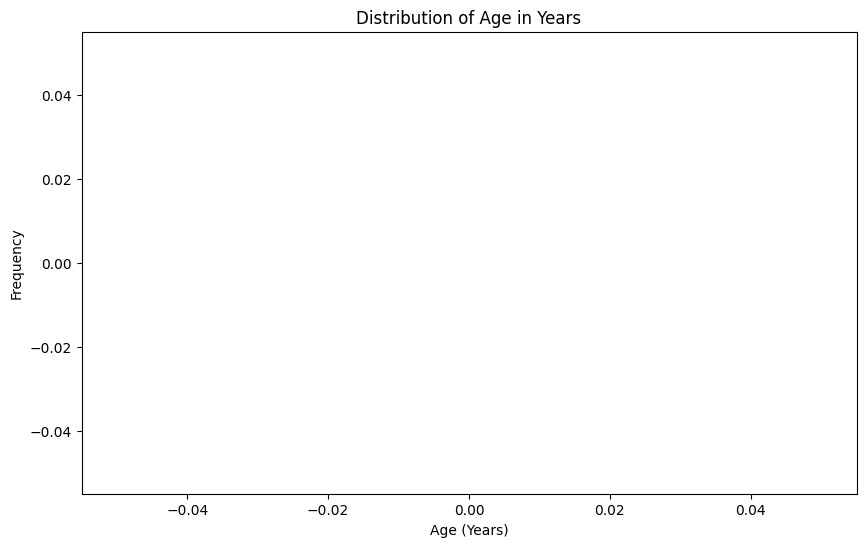

In [31]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'])
plt.title('Distribution of Age in Years')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

### Height Distribution

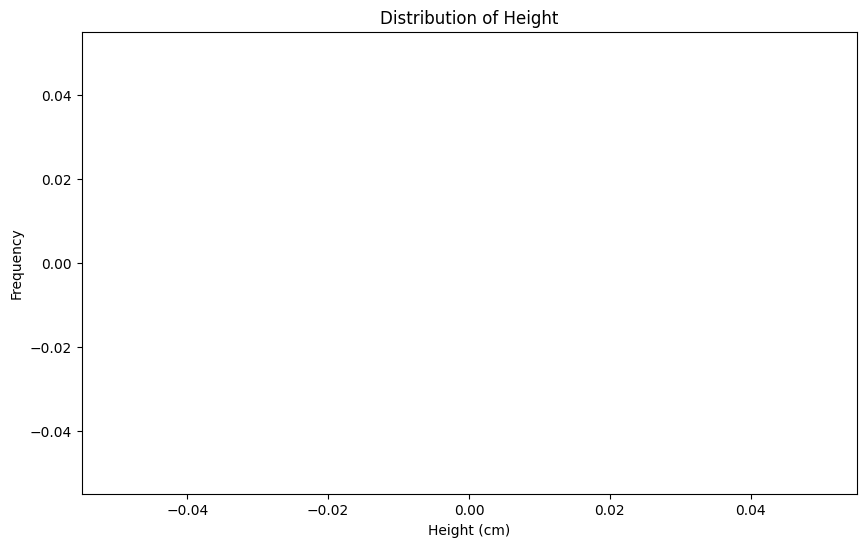

In [30]:
# Distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(df1['height'])
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

### Weight Distribution

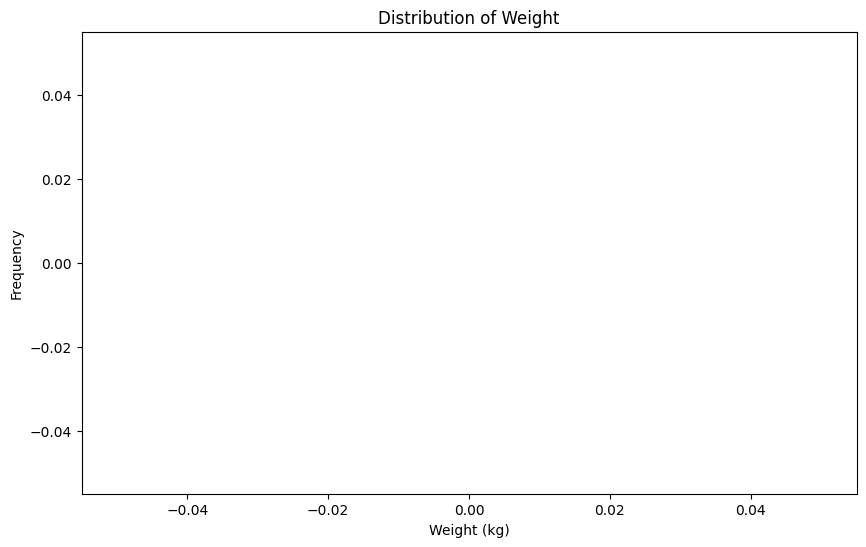

In [29]:
# Distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(df1['weight'])
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

### Gender Distribution

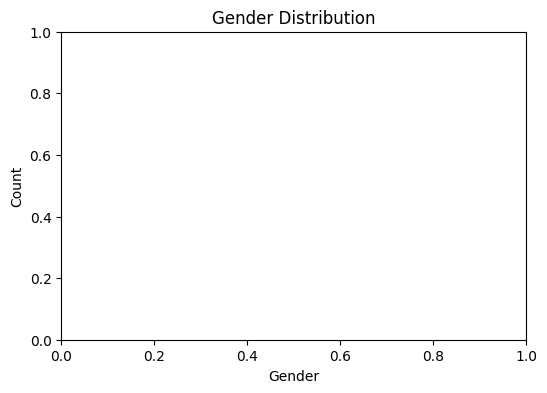

In [28]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df1)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Cholesterol Level Distribution

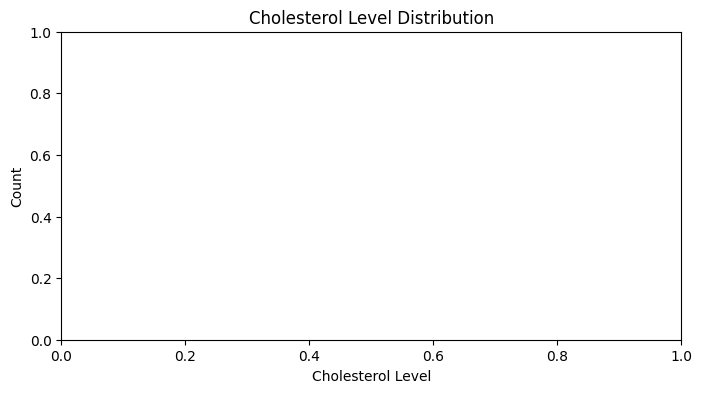

In [27]:
# Cholesterol level distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='cholesterol', data=df1)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

### Glucose Level Distribution

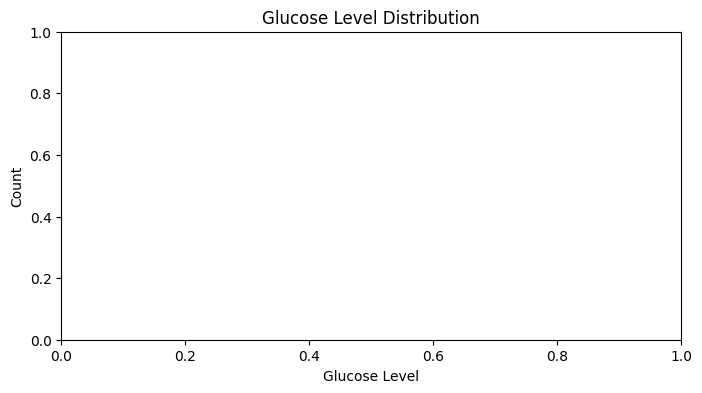

In [26]:
# Glucose level distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='glucose', data=df1)
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

### Smoking Status Distribution

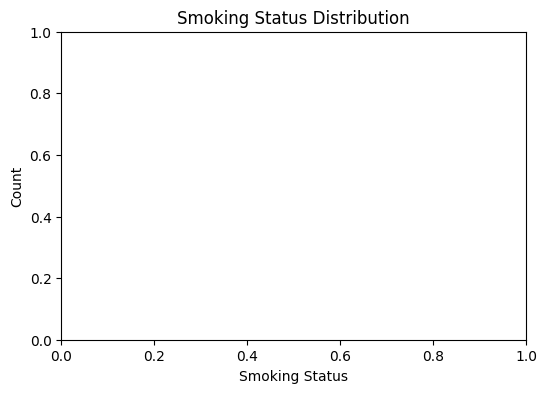

In [25]:
# Smoking status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=df1)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


### Alcohol Intake Distribution

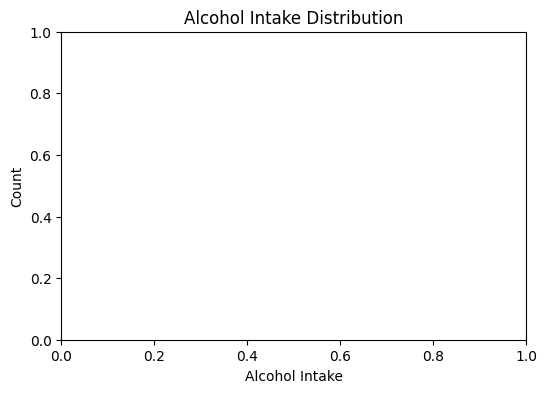

In [24]:
# Alcohol intake distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='alcohol_intake', data=df1)
plt.title('Alcohol Intake Distribution')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.show()

### Physical Activity Distribution

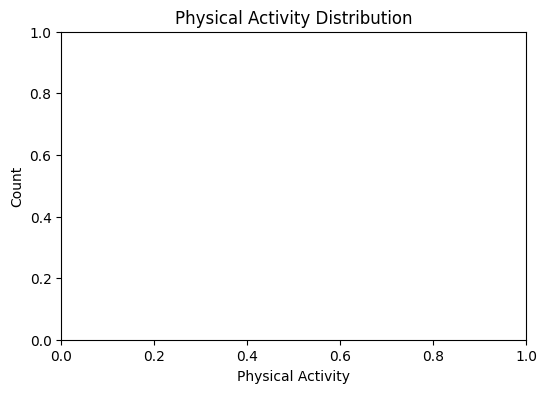

In [23]:
# Physical activity distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='physical_activity', data=df1)
plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

### Cardiovascular Disease Distribution

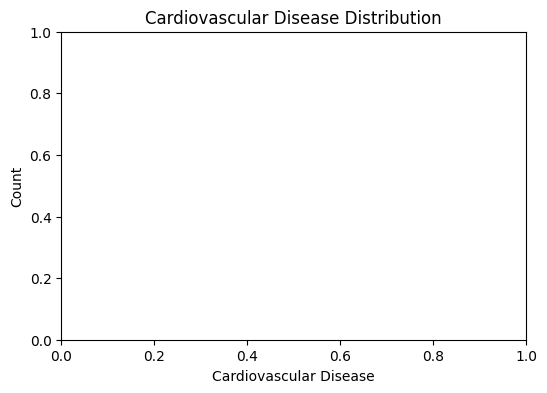

In [22]:
# Cardiovascular disease distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='active', data=df1)
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

### Frequency of Cardiovasular Disease based on Age

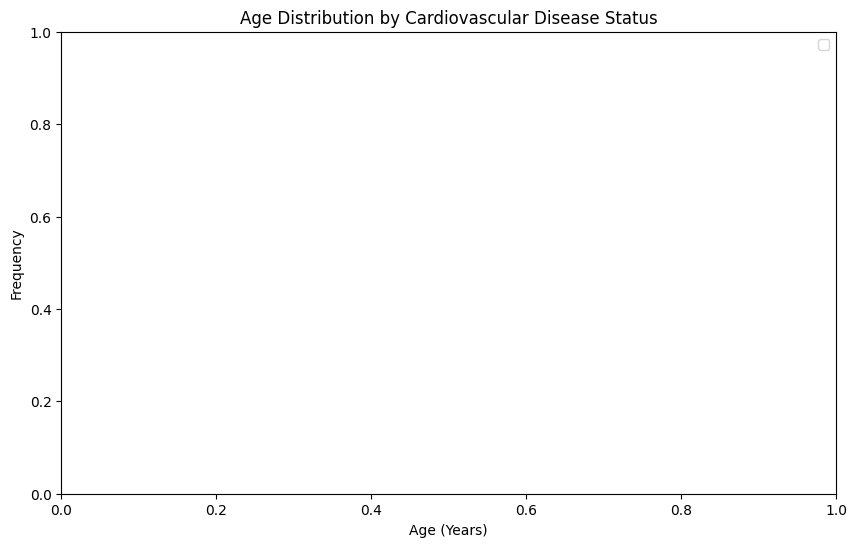

In [21]:
# Relationship between age and cardiovascular disease
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['active'] == 1]['age'], color='red', label='Cardiovascular Disease', kde=True, bins=30)
sns.histplot(df1[df1['active'] == 0]['age'], color='green', label='No Cardiovascular Disease', kde=True, bins=30)
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Frequency of Cardiovasular Disease based on Height

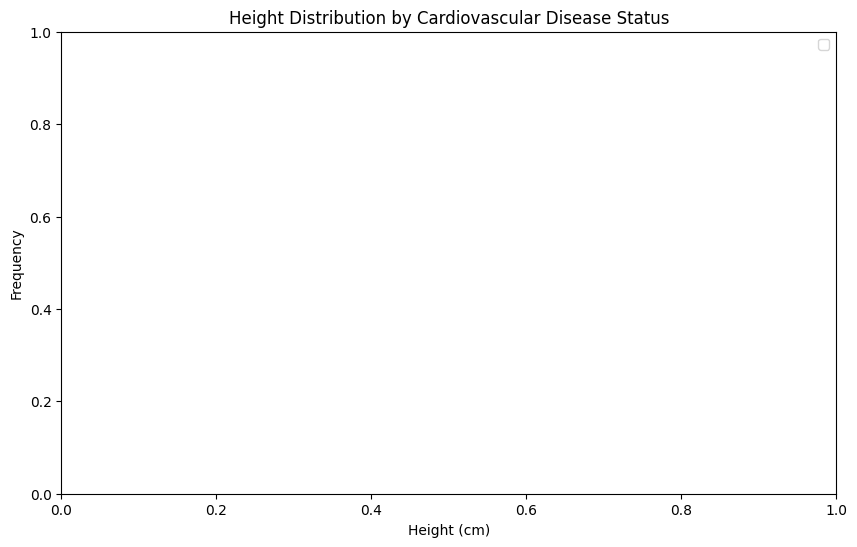

In [20]:
# Relationship between height and cardiovascular disease
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['active'] == 1]['height'], color='red', label='Cardiovascular Disease', kde=True, bins=30)
sns.histplot(df1[df1['active'] == 0]['height'], color='green', label='No Cardiovascular Disease', kde=True, bins=30)
plt.title('Height Distribution by Cardiovascular Disease Status')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Frequency of Cardiovasular Disease based on Weight

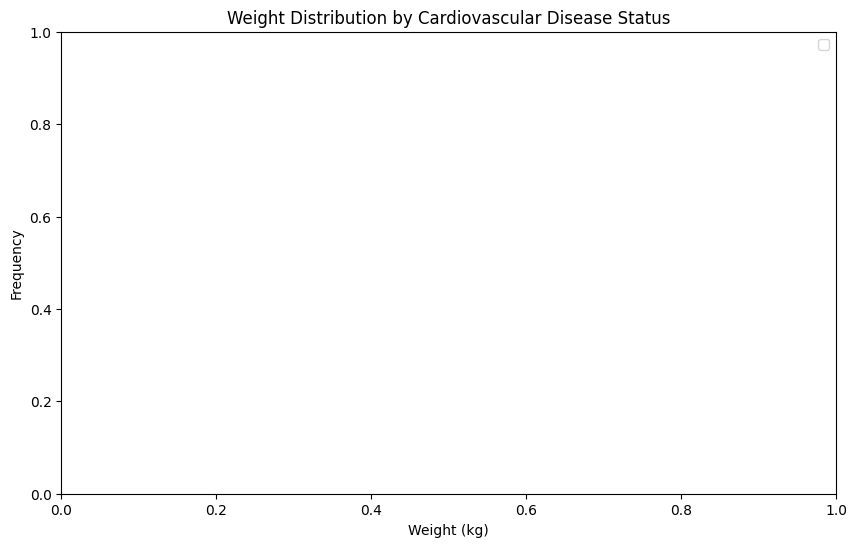

In [19]:
# Relationship between weight and cardiovascular disease
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['active'] == 1]['weight'], color='red', label='Cardiovascular Disease', kde=True, bins=30)
sns.histplot(df1[df1['active'] == 0]['weight'], color='green', label='No Cardiovascular Disease', kde=True, bins=30)
plt.title('Weight Distribution by Cardiovascular Disease Status')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Frequency of Cardiovasular Disease based on Cholesterol

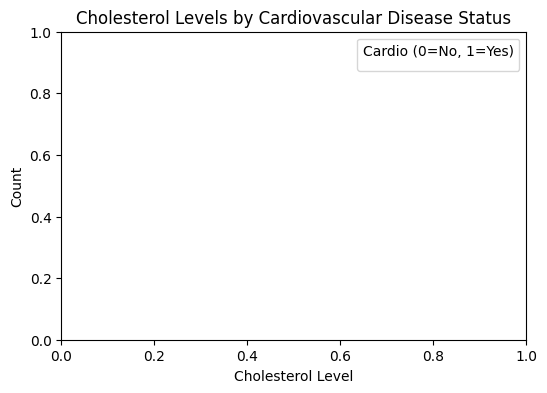

In [18]:
# Relationship between cholesterol and cardiovascular disease
plt.figure(figsize=(6, 4))
sns.countplot(x='cholesterol', hue='active', data=df1)
plt.title('Cholesterol Levels by Cardiovascular Disease Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='Cardio (0=No, 1=Yes)')
plt.show()

### Frequency of Cardiovasular Disease based on Gender

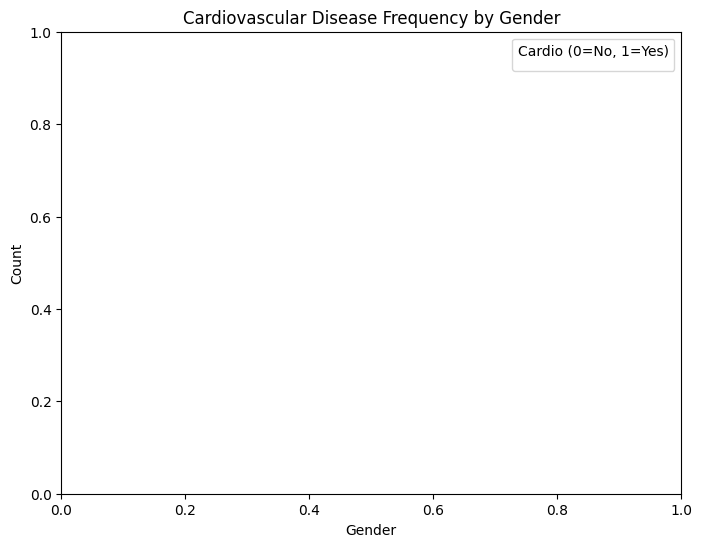

In [17]:
# Relationship between gender and cardiovascular disease
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='active', data=df1)
plt.title('Cardiovascular Disease Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardio (0=No, 1=Yes)')
plt.show()


## Encoding

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        0 non-null      int64 
 1   age                       0 non-null      int64 
 2   gender                    0 non-null      object
 3   height                    0 non-null      int64 
 4   weight                    0 non-null      int64 
 5   systolic_blood_pressure   0 non-null      int64 
 6   diastolic_blood_pressure  0 non-null      int64 
 7   cholesterol               0 non-null      object
 8   glucose                   0 non-null      object
 9   smoking                   0 non-null      object
 10  alcohol_intake            0 non-null      int64 
 11  active                    0 non-null      int64 
 12  physical_activity         0 non-null      int64 
dtypes: int64(9), object(4)
memory usage: 0.0+ bytes


<ipython-input-15-c6389d211a79>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[feature] >= lower_bound) & (df1[feature] <= upper_bound)]
<ipython-input-15-c6389d211a79>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[feature] >= lower_bound) & (df1[feature] <= upper_bound)]


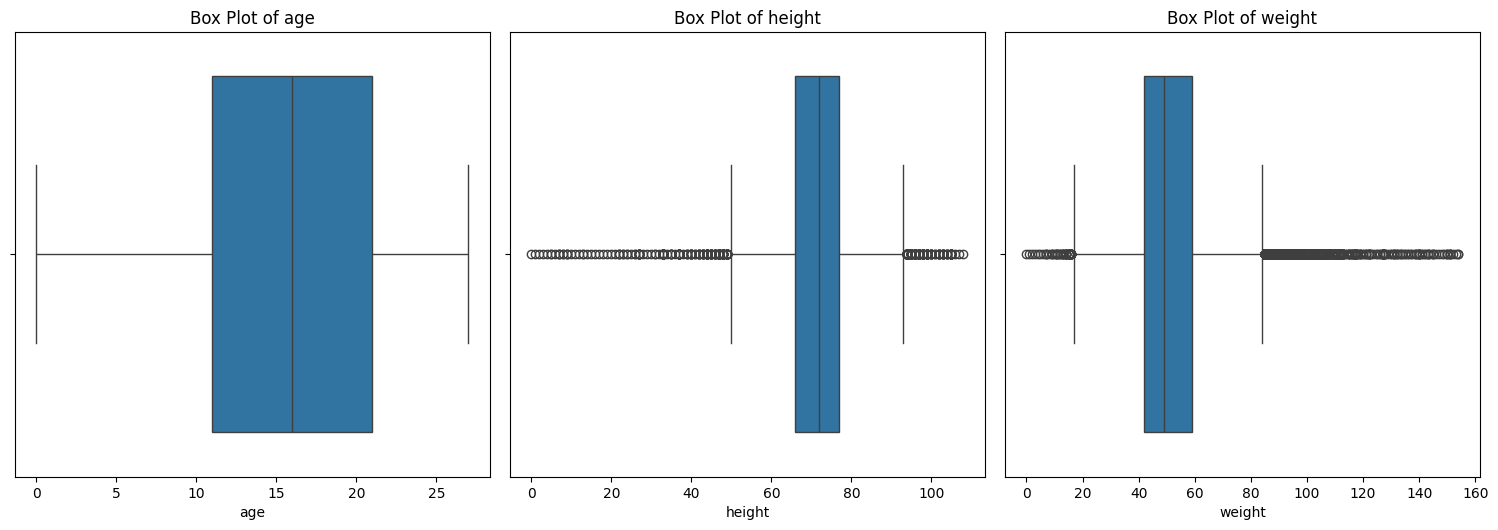

In [15]:
from sklearn.preprocessing import OrdinalEncoder

#  Ordinal features'age_years', 'height', and 'weight'
ordinal_features = ['age', 'height', 'weight']
encoder = OrdinalEncoder()
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

# Removing outliers using IQR method
for feature in ordinal_features:
  Q1 = df1[feature].quantile(0.25)
  Q3 = df1[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  df1 = df1[(df[feature] >= lower_bound) & (df1[feature] <= upper_bound)]

# Box plots after ordinal encoding and outlier removal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(ordinal_features):
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
#Removing outliers using IQR method for the 'height' and 'weight' columns
Q1 = df1['height'].quantile(0.25)
Q3 = df1['height'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1['height'] < (Q1 - 1.5 * IQR)) | (df1['height'] > (Q3 + 1.5 * IQR)))]

Q1 = df1['weight'].quantile(0.25)
Q3 = df1['weight'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1['weight'] < (Q1 - 1.5 * IQR)) | (df1['weight'] > (Q3 + 1.5 * IQR)))]

Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1['age'] < (Q1 - 1.5 * IQR)) | (df1['age'] > (Q3 + 1.5 * IQR)))]

from sklearn.preprocessing import StandardScaler

# Example: Scaling the 'age', 'height', and 'weight' columns
scaler = StandardScaler()
df1[['age', 'height', 'weight']] = scaler.fit_transform(df1[['age', 'height', 'weight']])


## Correlation

In [13]:
df2=df.drop(["id"],axis=1)

In [14]:
# Make a correlation matrix
df2.corr()

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,active,physical_activity
age,1.000000,-0.022913,-0.081506,0.053559,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155412,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290966,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053559,0.155412,0.290966,1.000000,0.030702,0.043711,0.141763,0.106859,0.067779,0.067115,-0.016865,0.181656
systolic_blood_pressure,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
diastolic_blood_pressure,0.017620,0.015254,0.006150,0.043711,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141763,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
glucose,0.098388,-0.020491,-0.018595,0.106859,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoking,-0.047649,0.338135,0.187989,0.067779,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alcohol_intake,-0.029756,0.170966,0.094419,0.067115,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


## Modelling

In [32]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score

In [33]:
df.head()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,active,physical_activity
0,0,13.0,2,75.0,39.0,110,80,1,1,0,0,1,0
1,1,18.0,1,63.0,62.0,140,90,3,1,0,0,1,1
2,2,14.0,1,72.0,41.0,130,70,3,1,0,0,0,1
3,3,11.0,2,76.0,59.0,150,100,1,1,0,0,1,1
4,4,10.0,1,63.0,33.0,100,60,1,1,0,0,0,0


### Splitting Data

In [34]:
# Splitting the data into training and testing sets
X = df.drop(columns=['active'])
Y = df['active']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(70000, 12) (56000, 12) (14000, 12)


In [36]:
Y_train, len(Y_train)

(47339    1
 67456    0
 12308    1
 32557    1
 664      1
         ..
 37194    1
 6265     1
 54886    1
 860      0
 15795    1
 Name: active, Length: 56000, dtype: int64,
 56000)

### Logistic Regression

In [37]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=100000)

# Fit the model to the training data
log_reg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_log_reg))

# Print a detailed classification report
print(classification_report(Y_test, Y_pred_log_reg, zero_division=1))

Logistic Regression Accuracy: 0.8035714285714286
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2750
           1       0.80      1.00      0.89     11250

    accuracy                           0.80     14000
   macro avg       0.90      0.50      0.45     14000
weighted avg       0.84      0.80      0.72     14000



### K-Nearest Neighbors Classifier

In [38]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

K-Nearest Neighbors Accuracy: 0.7700714285714285
              precision    recall  f1-score   support

           0       0.20      0.06      0.09      2750
           1       0.80      0.94      0.87     11250

    accuracy                           0.77     14000
   macro avg       0.50      0.50      0.48     14000
weighted avg       0.69      0.77      0.72     14000



In [39]:
# Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Accuracy:", accuracy_score(Y_test, Y_pred_rf))

# Print a detailed classification report
print(classification_report(Y_test, Y_pred_rf))


K-Nearest Neighbors Accuracy: 0.8004285714285714
              precision    recall  f1-score   support

           0       0.36      0.02      0.04      2750
           1       0.81      0.99      0.89     11250

    accuracy                           0.80     14000
   macro avg       0.58      0.51      0.46     14000
weighted avg       0.72      0.80      0.72     14000

